# Proyek Analisis Data: Nama dataset
- Nama: Whisnumurty Galih Ananta
- Email: whisnumurty0045@gmail.com
- Id Dicoding: whive_einz

## Menentukan Pertanyaan Bisnis

- pertanyaan 1: Jumlah Order secara dinamis
- pertanyaan 2: Trend pembelian produk berdasarkan bulan
- pertanyaan 3: Bagaiamana Demografi Pelanggan yang kita miliki?

## Menyiapkan semua library yang dibutuhkan

In [69]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('agg')  # Menggunakan backend non-interactive
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency

## Data Wrangling

### Gathering Data

In [70]:
customer_df = pd.read_csv('E-Commerce Public Dataset/customers_dataset.csv')
geolocation_df = pd.read_csv('E-Commerce Public Dataset/geolocation_dataset.csv')
order_items_df = pd.read_csv('E-Commerce Public Dataset/order_items_dataset.csv')
order_payments_df = pd.read_csv('E-Commerce Public Dataset/order_payments_dataset.csv')
order_reviews_df = pd.read_csv('E-Commerce Public Dataset/order_reviews_dataset.csv')
orders_df = pd.read_csv('E-Commerce Public Dataset/orders_dataset.csv')
product_category_name_df = pd.read_csv('E-Commerce Public Dataset/product_category_name_translation.csv')
products_df = pd.read_csv('E-Commerce Public Dataset/products_dataset.csv')
sellers_df = pd.read_csv('E-Commerce Public Dataset/sellers_dataset.csv')

In [71]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [72]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [73]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [74]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [75]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [76]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [77]:
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [78]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [79]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Note
- Berdasarkan Pertanyaan Analisis hanya 6 tabel yang dibutuhkan
    1. geolocation => untuk mengetahui demografi pelanggan
    2. order_items => untuk mengetahui trend produk
    3. orders => untuk mengetahui RFM
    4. product_category_name => untuk mengetahui nama produk
    5. customer => utama
    6. orders_payment => untuk mengetahui Monetary pada RFM aanalisis

In [80]:
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [81]:
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [82]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [83]:
product_category_name_df.duplicated().sum()

0

In [84]:
customer_df.duplicated().sum()

0

In [85]:
order_payments_df.duplicated().sum()

0

In [86]:
merged_df = customer_df.join(orders_df.set_index('customer_id'), on='customer_id', how='inner')
merged_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [87]:
merged_df = merged_df.join(order_items_df.set_index('order_id'), on='order_id', how='inner')
merged_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [88]:
merged_df = merged_df.join(products_df.set_index('product_id'), on='product_id', how='inner', rsuffix='_products')
merged_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
6177,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
6177,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
16036,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,124.99,15.62,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
19847,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,106.99,30.59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


In [89]:
merged_df = merged_df.join(product_category_name_df.set_index('product_category_name'), on='product_category_name', how='inner', rsuffix='_')
merged_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
6177,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
6177,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
16036,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,15.62,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
19847,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,30.59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture


In [90]:
merged_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [91]:
column_needs = ['customer_id', 'customer_unique_id', 'customer_state', 
                'order_id', 'order_approved_at', 'order_delivered_customer_date',
                'order_item_id', 'product_id', 'price', 'product_category_name_english'
                ]

columns_to_drop = [col for col in merged_df.columns if col not in column_needs]
merged_df = merged_df.drop(columns=columns_to_drop)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111023 entries, 0 to 48069
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    111023 non-null  object 
 1   customer_unique_id             111023 non-null  object 
 2   customer_state                 111023 non-null  object 
 3   order_id                       111023 non-null  object 
 4   order_approved_at              111009 non-null  object 
 5   order_delivered_customer_date  108637 non-null  object 
 6   order_item_id                  111023 non-null  int64  
 7   product_id                     111023 non-null  object 
 8   price                          111023 non-null  float64
 9   product_category_name_english  111023 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 9.3+ MB


In [92]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

In [93]:
merged_df.shape

(111023, 10)

### Assessing Data

In [94]:
merged_df.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_state                      0
order_id                            0
order_approved_at                  14
order_delivered_customer_date    2386
order_item_id                       0
product_id                          0
price                               0
product_category_name_english       0
dtype: int64

In [95]:
merged_df.duplicated().sum()

0

### Cleaning Data

In [96]:
merged_df.dropna()

,customer_id,customer_unique_id,customer_state,order_id,order_approved_at,order_delivered_customer_date,order_item_id,product_id,price,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,2017-05-25 10:35:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,office_furniture
6177,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-10 00:47:48,2017-11-28 00:09:50,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,office_furniture
6177,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-10 00:47:48,2017-11-28 00:09:50,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,office_furniture
16036,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,RS,b1a5d5365d330d10485e0203d54ab9e8,2017-05-08 22:22:56,2017-05-26 09:54:04,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,office_furniture
19847,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,RJ,2e604b3614664aa66867856dba7e61b7,2018-02-04 22:29:19,2018-02-28 21:09:00,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,office_furniture
...,...,...,...,...,...,...,...,...,...,...
70244,8325d6e7af2f2bfb58cf040729b232dd,a1d53377ab83871b0ad483b03ac69d6c,SP,b99217b1fcf2fdeace7b8d869b76cb91,2018-03-07 17:55:36,2018-03-15 22:04:49,1,57bdf3098169cccdb62221bd3e089cbd,39.99,fashion_childrens_clothes
87255,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,SP,9fa3a005f89a187501fa1bd63d6125fb,2017-10-09 00:17:50,2017-10-16 21:59:33,1,57bdf3098169cccdb62221bd3e089cbd,39.99,fashion_childrens_clothes
82270,14acb30bbc064408dcb8cdd3c92b0c97,1b553902a5bbe6ee54a3aaa7cbfb6816,RJ,ee86b68eb9222b0cad7da50f4f758a35,2017-05-17 17:55:12,2017-05-20 08:44:01,1,0ab3ab3b2869073aa9afe795fe9151aa,110.00,fashion_childrens_clothes
28761,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,RO,2c4ada2e75c2ad41dd93cebb5df5f023,2017-01-26 11:22:17,2017-02-14 16:24:01,1,6c7a0a349ad11817745e3ad58abd5c79,183.29,security_and_services


In [97]:
merged_df.isnull().sum()


customer_id                         0
customer_unique_id                  0
customer_state                      0
order_id                            0
order_approved_at                  14
order_delivered_customer_date    2386
order_item_id                       0
product_id                          0
price                               0
product_category_name_english       0
dtype: int64

In [98]:
merged_df.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [99]:
merged_df.head()

,customer_id,customer_unique_id,customer_state,order_id,order_approved_at,order_delivered_customer_date,order_item_id,product_id,price,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,2017-05-25 10:35:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,office_furniture
6177,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-10 00:47:48,2017-11-28 00:09:50,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,office_furniture
6177,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-10 00:47:48,2017-11-28 00:09:50,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,office_furniture
16036,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,RS,b1a5d5365d330d10485e0203d54ab9e8,2017-05-08 22:22:56,2017-05-26 09:54:04,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,office_furniture
19847,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,RJ,2e604b3614664aa66867856dba7e61b7,2018-02-04 22:29:19,2018-02-28 21:09:00,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,office_furniture


In [100]:
merged_df.describe(include='all')

,customer_id,customer_unique_id,customer_state,order_id,order_approved_at,order_delivered_customer_date,order_item_id,product_id,price,product_category_name_english
count,111023,111023,111023,111023,111009,108637,111023.000000,111023,111023.000000,111023
unique,97256,94088,27,97256,88964,94337,NaN,32328,NaN,71
top,fc3d1daec319d62d49bfb5e1f83123e9,c8460e4251689ba205045f3ea17884a1,SP,8272b63d03f5f79c56e9e4120aec44ef,2018-02-24 03:20:27,2017-07-31 18:03:02,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,NaN,bed_bath_table
freq,21,24,46782,21,23,21,NaN,527,NaN,11115
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.198229,NaN,120.755104,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.706931,NaN,183.372746,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.850000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,39.900000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,74.990000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,134.900000,NaN


In [101]:
merged_df.head()

,customer_id,customer_unique_id,customer_state,order_id,order_approved_at,order_delivered_customer_date,order_item_id,product_id,price,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,2017-05-25 10:35:35,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,office_furniture
6177,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-10 00:47:48,2017-11-28 00:09:50,1,a9516a079e37a9c9c36b9b78b10169e8,112.99,office_furniture
6177,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,PA,c1d2b34febe9cd269e378117d6681172,2017-11-10 00:47:48,2017-11-28 00:09:50,2,a9516a079e37a9c9c36b9b78b10169e8,112.99,office_furniture
16036,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,RS,b1a5d5365d330d10485e0203d54ab9e8,2017-05-08 22:22:56,2017-05-26 09:54:04,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,office_furniture
19847,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,RJ,2e604b3614664aa66867856dba7e61b7,2018-02-04 22:29:19,2018-02-28 21:09:00,1,a9516a079e37a9c9c36b9b78b10169e8,106.99,office_furniture


### Explore Jumlah Customer setiap state

In [102]:
merged_df.groupby(by="customer_state").agg({
    "customer_id": "nunique",
}).head(10)

,customer_id
customer_state,
AC,79
AL,407
AM,146
AP,68
BA,3314
CE,1312
DF,2094
ES,2008
GO,1959


### Explore Jumlah Order per Hari

In [103]:
# Ubah kolom tanggal menjadi tipe data datetime
merged_df['order_delivered_customer_date'] = pd.to_datetime(merged_df['order_delivered_customer_date'])

# Buat kolom baru untuk tanggal pesanan
merged_df['order_date'] = merged_df['order_delivered_customer_date'].dt.date

In [104]:
merged_df.groupby(by="order_date").agg({
    "order_id": "count",
}).head(10)

,order_id
order_date,
2016-10-11,3
2016-10-13,15
2016-10-14,19
2016-10-15,18
2016-10-16,12
2016-10-17,27
2016-10-18,20
2016-10-19,9
2016-10-20,11


### Explore Daya beli pelanggan berdasarkan State

In [105]:
merged_df.groupby(by="customer_state").agg({
    "customer_id": "nunique",
    "price" : ['min', 'mean', 'max']
}).head(10)

customer_id  price                     
                   nunique    min        mean      max
customer_state                                        
AC                      79  12.90  176.845000  1200.00
AL                     407   9.00  181.226886  1798.00
AM                     146   8.50  133.834601  1688.00
AP                      68  13.65  164.320732  1437.00
BA                    3314   5.20  135.104746  2999.89
CE                    1312   7.80  153.224685  2690.00
DF                    2094   4.90  126.381007  3999.00
ES                    2008   5.99  122.172940  6729.00
GO                    1959   3.90  125.448517  2299.95
MA                     730   9.00  145.199631  2499.75

### Produk Popular

In [106]:
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'])

In [107]:
# Membuat kolom tahun dan bulan dari kolom tanggal
merged_df['year'] = merged_df['order_date'].dt.year
merged_df['month'] = merged_df['order_date'].dt.month
merged_df['date'] = merged_df['order_date'].dt.day

In [109]:
merged_df.to_csv('merged_fix_df.csv', index=False)

In [108]:
merged_df.to_c

AttributeError: 'DataFrame' object has no attribute 'to_c'

In [ ]:
merged_df.groupby(by=['product_category_name_english']).agg({
    "product_category_name_english": ["count"],
})

,product_category_name_english
,count
product_category_name_english,
agro_industry_and_commerce,212
air_conditioning,297
art,209
arts_and_craftmanship,24
audio,364
...,...
stationery,2517
tablets_printing_image,83


In [ ]:
merged_df['year'].value_counts()

year
2018.0    62325
2017.0    45991
2016.0      321
Name: count, dtype: int64

### Trend Pembelian berdasarkan Bulan

In [ ]:
merged_df.groupby(by=['month','product_category_name_english']).agg({
    "product_category_name_english": ["count"],
})

product_category_name_english
                                                            count
month product_category_name_english                              
1.0   agro_industry_and_commerce                               20
      air_conditioning                                         15
      art                                                      10
      audio                                                    26
      auto                                                    258
...                                                           ...
12.0  stationery                                              216
      tablets_printing_image                                   11
      telephony                                               357
      toys                                                    605
      watches_gifts                                           428

[792 rows x 1 columns]

### Popular Produk yang dibeli pada setiap state

In [ ]:
merged_df.groupby(by=["customer_state", 'product_category_name_english']).agg({
    "product_category_name_english": ["count"],
})

product_category_name_english
                                                                     count
customer_state product_category_name_english                              
AC             auto                                                      4
               baby                                                      3
               bed_bath_table                                            4
               books_general_interest                                    2
               christmas_supplies                                        1
...                                                                    ...
TO             sports_leisure                                           25
               stationery                                                3
               telephony                                                21
               toys                                                     13
               watches_gifts                                            30

[1356 rows x 1 columns]

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Jumlah Order secara dinamis

In [ ]:
#contoh 2017 bulan 1
start_date = '2017-01-01'
end_date = '2017-01-30'

# Konversi kolom 'order_date' menjadi tipe data datetime jika belum
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'])

# Filter DataFrame berdasarkan rentang tanggal
filtered_df = merged_df.query("@start_date <= order_date <= @end_date")

# Groupby untuk menghitung jumlah pesanan berdasarkan tanggal setelah filtering
result = filtered_df.groupby('order_date')['order_id'].count()

result.head()

order_date
2017-01-11     1
2017-01-12     3
2017-01-13     5
2017-01-16    22
2017-01-17    15
Name: order_id, dtype: int64

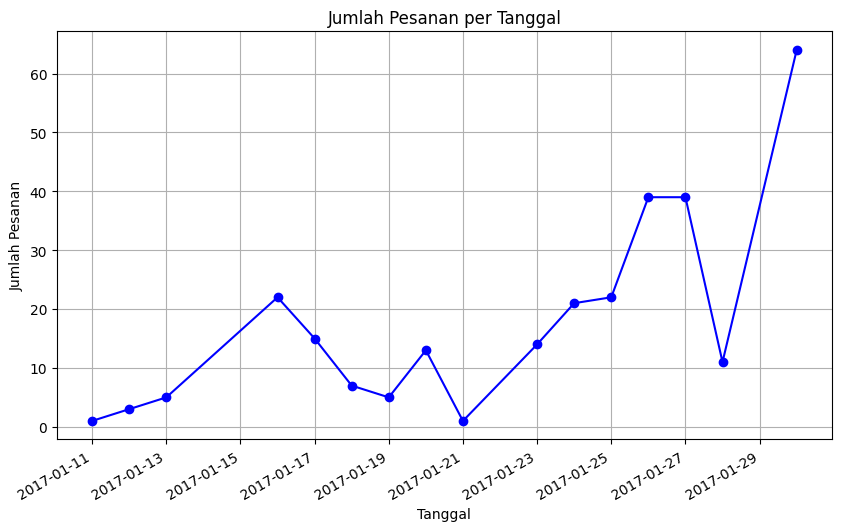

In [ ]:
result.plot(kind='line', figsize=(10, 6), color='blue', linestyle='-', marker='o')
plt.title('Jumlah Pesanan per Tanggal')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pesanan')
plt.grid(True)
plt.show()


### Pertanyaan 2: Trend pembelian produk berdasarkan bulan

In [ ]:
merged_df.groupby(by=['month','product_category_name_english']).agg({
    "product_category_name_english": ["count"],
})

product_category_name_english
                                                            count
month product_category_name_english                              
1.0   agro_industry_and_commerce                               20
      air_conditioning                                         15
      art                                                      10
      audio                                                    26
      auto                                                    258
...                                                           ...
12.0  stationery                                              216
      tablets_printing_image                                   11
      telephony                                               357
      toys                                                    605
      watches_gifts                                           428

[792 rows x 1 columns]

<Figure size 1500x800 with 0 Axes>

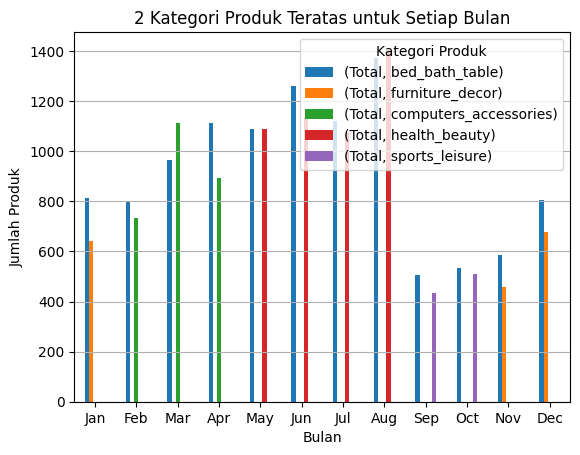

In [ ]:
import matplotlib.pyplot as plt
import calendar

# Melakukan groupby dan aggregasi data
agg_data = merged_df.groupby(by=['month', 'product_category_name_english']).agg({"product_category_name_english": ["count"]})

# Mengubah nama kolom agar lebih mudah diakses
agg_data.columns = ['Total']

# Menemukan 3 kategori teratas untuk setiap bulan
top_categories_per_month = agg_data.groupby('month').apply(lambda x: x.nlargest(2, 'Total'))

# Mengubah angka bulan menjadi tiga karakter awal dari nama bulan
month_abbr = {i: calendar.month_abbr[i] for i in range(1, 13)}

# Mengubah label sumbu x menjadi tiga karakter awal dari nama bulan
plt.figure(figsize=(15, 8))  # Ubah ukuran di sini
ax = top_categories_per_month.unstack().plot(kind='bar', stacked=False)
plt.title('2 Kategori Produk Teratas untuk Setiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Produk')
plt.legend(title='Kategori Produk', loc='upper right')

# Mengubah label sumbu x menjadi tiga karakter awal dari nama bulan
plt.xticks(ticks=range(len(month_abbr)), labels=[month_abbr[i] for i in month_abbr])
plt.xticks(rotation=0)  # Ubah rotasi label sumbu x ke 0 derajat
plt.grid(axis='y')
plt.show()


### Pertanyaan 3 : Bagaiamana Demografi Pelanggan yang kita miliki?

<Figure size 1000x600 with 0 Axes>

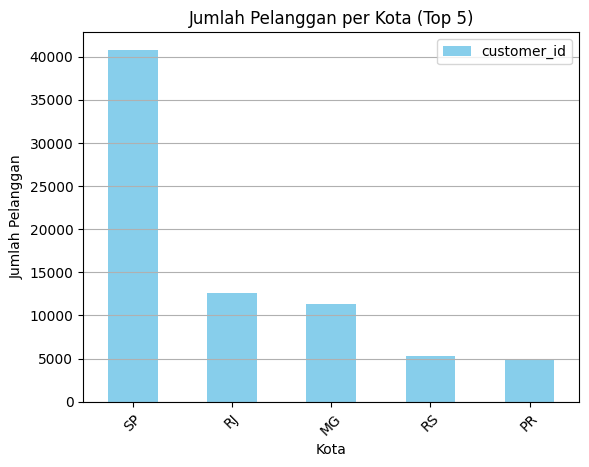

In [ ]:
import matplotlib.pyplot as plt

# Melakukan groupby dan aggregasi data
customer_count = merged_df.groupby(by="customer_state").agg({
    "customer_id": "nunique",
}).sort_values(by='customer_id', ascending=False).head(5)

# Menampilkan diagram batang untuk 5 kota teratas
plt.figure(figsize=(10, 6))
customer_count.plot(kind='bar', color='skyblue')
plt.title('Jumlah Pelanggan per Kota (Top 5)')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## Conclusion

### Conclutson pertanyaan 1
Pada bulan Januari tahun 2017 lonjakan jumlah pesanan tertinggi terjadi pada tanggal 30 
### conclusion pertanyaan 2
Tren produk per bulan menunjukkan dominasi kategori bed_bath_table. Sementara itu, tren untuk computers_accessories mengalami peningkatan dari Februari hingga Mei. Tren kategori health_beauty meningkat pada rentang bulan Mei hingga Agustus. Pada bulan September dan Oktober, terjadi tren peningkatan untuk sports_leisure, sementara furniture decor mengalami tren peningkatan di akhir dan awal tahun.
### conclusion pertanyaan 3
Kota Sao Paulo (SP) merupakan pasar terbesar dengan jumlah pelanggan terbanyak